<div class="alert alert-block alert-danger">
    
### Notes

</div>

### K-Means Clustering, PCA, Numerical python, $ \ldots $.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
plt.close('all')
np.random.seed(1234)

In [5]:
data = pd.read_csv('pima-indians-diabetes-database.csv')
print(data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
X, Y = data.iloc[:, 0:-1], data.iloc[:, -1]

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [8]:
X = StandardScaler().fit_transform(X)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [9]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)
print('First two principal components. Size:', pca_components.shape)

First two principal components. Size: (768, 2)


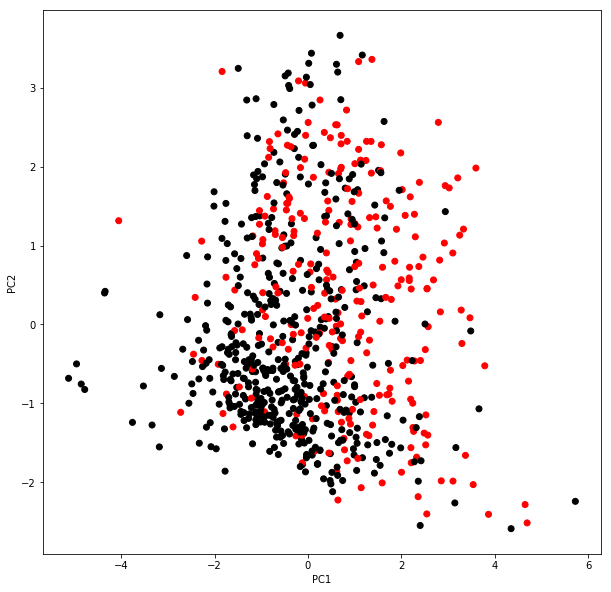

In [10]:
plt.figure(figsize=(10,10))
colors = np.array(['black', 'red'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(pca_components[:,0], pca_components[:,1], c=colors[Y]);

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

In [12]:
lda = LinearDiscriminantAnalysis(store_covariance=True).fit(pca_components, Y)
lda_predicts = lda.predict(pca_components)
print(confusion_matrix(Y, lda_predicts))

qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(pca_components, Y)
qda_predicts = qda.predict(pca_components)
print(confusion_matrix(Y, qda_predicts))

[[428  72]
 [145 123]]
[[422  78]
 [145 123]]


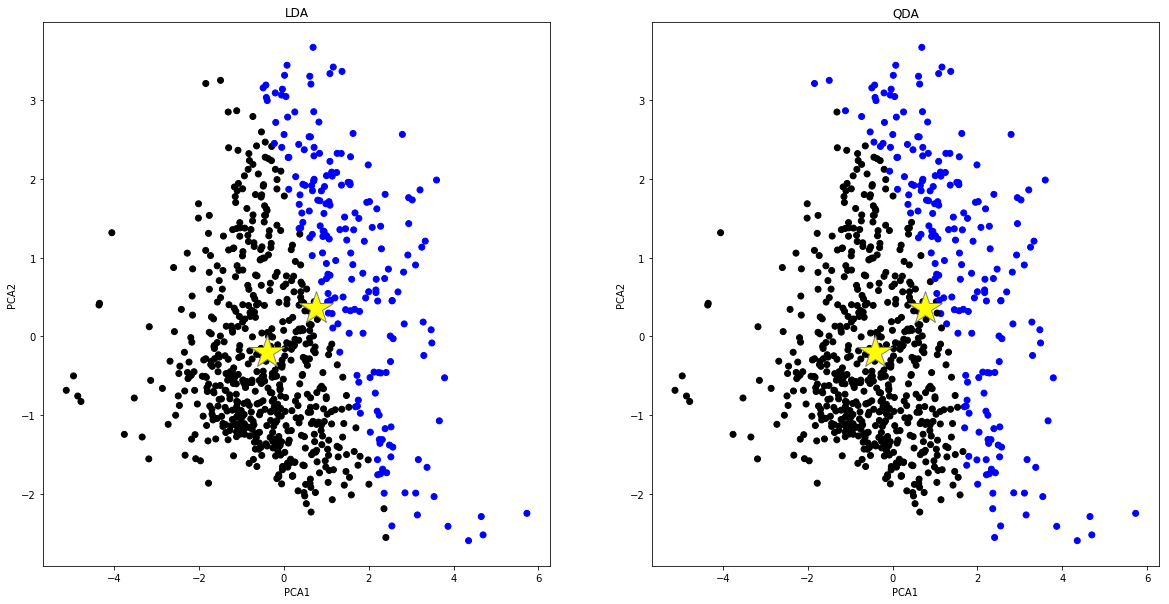

In [13]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title('LDA')
plt.xlabel('PCA1'), plt.ylabel('PCA2')
colors = np.array(['black', 'blue'])
plt.scatter(pca_components[:,0], pca_components[:,1], c=colors[lda_predicts])

plt.plot(lda.means_[0][0], lda.means_[0][1], '*', color='yellow', markersize=35, markeredgecolor='grey')
plt.plot(lda.means_[1][0], lda.means_[1][1], '*', color='yellow', markersize=35, markeredgecolor='grey');

plt.subplot(1,2,2)
plt.title('QDA')
plt.xlabel('PCA1'), plt.ylabel('PCA2')
colors = np.array(['black', 'blue'])
plt.scatter(pca_components[:,0], pca_components[:,1], c=colors[qda_predicts])

plt.plot(qda.means_[0][0], qda.means_[0][1], '*', color='yellow', markersize=35, markeredgecolor='grey')
plt.plot(qda.means_[1][0], qda.means_[1][1], '*', color='yellow', markersize=35, markeredgecolor='grey');

***

In [14]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(pca_components)

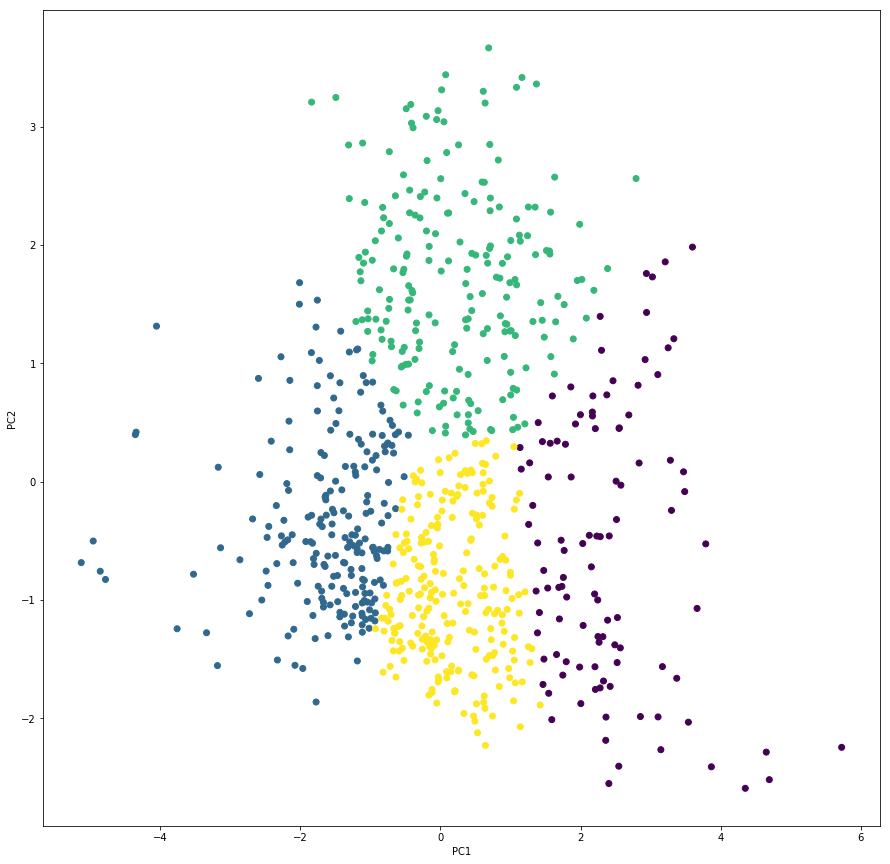

In [15]:
plt.figure(figsize=(15,15))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(pca_components[:,0], pca_components[:,1], c=kmeans.labels_);

In [16]:
from scipy.cluster.hierarchy import fclusterdata
from scipy.cluster.vq import kmeans